In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import sys
sys.path.append("..")

In [4]:
from utils import parse_outputs_v2

In [317]:
def draw_multiple(data, labels=None, figsize=(4,2), xlim=(10, 20), price_number_offset=(-30,0.2)):

    # Divide data into 10 bins
    bins = np.linspace(10, 20, 11)

    # Compute histogram of the data
    hist = []
    for d in data:
        h, b = np.histogram(d, bins=bins)
        hist.append(h)

    # Create a bar plot using Matplotlib
    plt.figure(figsize=figsize, dpi=250)
    
    if(labels is None):
        labels = []
        for i in range(len(hist)):
            labels.append('Round %d' % (i + 1))
           
    # basic params
    bar_width = 0.8 / len(hist)
    x_shift = -2
    left = 0
    xticks = [left]
    means = [np.average(d) for d in data]
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    
    # bar figures
    for i in range(len(hist)):
        # bars
        plt.barh(y=bins[:-1] + 0.5, width=hist[i], height=0.5, left=left, label=labels[i], alpha=0.5, color=colors[i])
        
        # base lines for the bars 
        plt.vlines(x=left + x_shift, ymin=10, ymax=20, color="grey", linewidth=1.5)
        
        # success rate
        success_rate = len(data[i]) / 200
        plt.vlines(x=left + x_shift, ymin=10, ymax=10 + 10 * success_rate, linewidth=1.5, color=colors[i])
        
        # add text showing "round i"
        round_label = labels[i] + "\nsr=%.2f" % success_rate
        plt.text(left + 1, 10, round_label, ha='left', fontsize=5)
        
        # add text showing the mean price
        plt.text(left + price_number_offset[0], means[i] + price_number_offset[1], "%.2f" % means[i], ha='left', fontsize=7, zorder=8, weight="bold")
        
        # update base lines
        left = left + hist[i].max() + 20
        xticks.append(left)
        
    # compute the centers and lineplot
    x = np.array(xticks[:-1])
    plt.plot(x + x_shift, means, color="dimgray", linestyle="--", linewidth=1, zorder=5, alpha=0.5)
    plt.scatter(x + x_shift, means, color="dimgray", s=5, zorder=10)

    # Set the title and axis labels
    plt.title('Distribution of deal price', fontsize=8)
    
    # Set the ticks 
    xticks = xticks[:-1]
    plt.xticks(xticks, ["", "", "", "", ""], fontsize=8, ha="left")
    yticks = [10, 12, 14, 16, 18, 20]
    plt.yticks(yticks, [str(y) for y in yticks], fontsize=6)
    
    # xlim
    plt.xlim(xlim)

    # Display the plot
    plt.show()
    return bins, hist


## 0.3.1.0 criticize buyer gpt3.5 turbo 

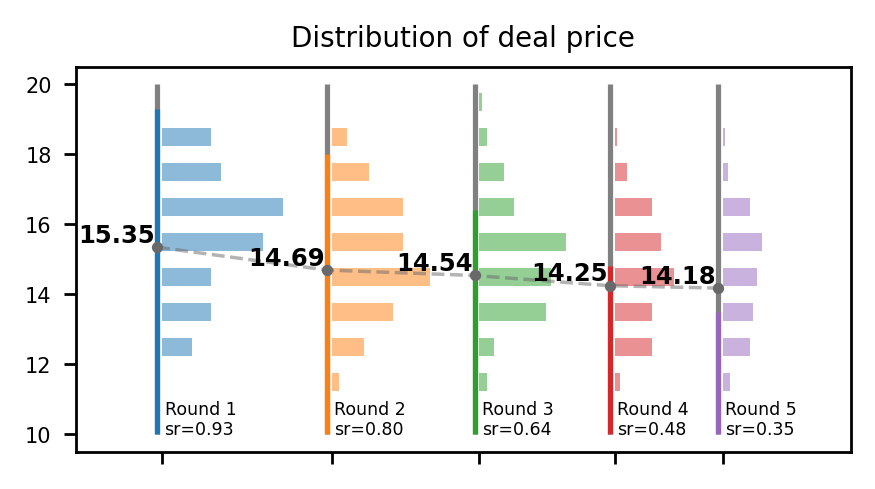

In [319]:
prices = parse_outputs_v2("../outputs/criticize_buyer_200_runs_5_rollout_ver_0.3.1.0.txt")

prices_ = []
for p in prices:
    p_ = []
    for pi in p:
        if(pi > 10 and pi < 20): p_.append(pi)
        else: break
    if(len(p_) > 0): prices_.append(p_)
    
prices_reshape = [[], [], [], [], []]
for p in prices_:
    for pi, p_ in enumerate(p):
        prices_reshape[pi].append(p_)

_, _ = draw_multiple(prices_reshape, xlim=(-35,280), price_number_offset=(-34, 0.15))

## 0.3.0.0 criticize seller gpt 3.5 turbo

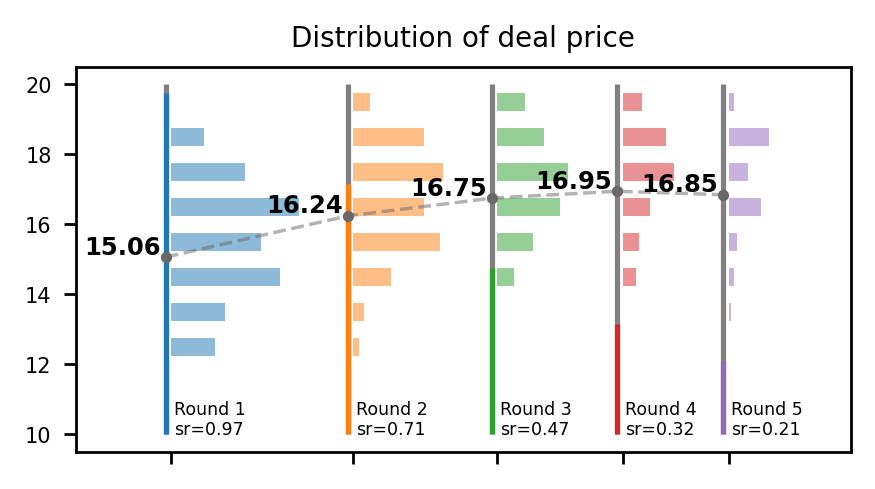

In [320]:
prices = parse_outputs_v2("../outputs/criticize_seller_200_runs_5_rollout_ver_0.3.0.0.txt")

prices_ = []
for p in prices:
    p_ = []
    for pi in p:
        if(pi > 10 and pi < 20): p_.append(pi)
        else: break
    if(len(p_) > 0): prices_.append(p_)
    
prices_reshape = [[], [], [], [], []]
for p in prices_:
    for pi, p_ in enumerate(p):
        prices_reshape[pi].append(p_)

_, _ = draw_multiple(prices_reshape, xlim=(-35,250), price_number_offset=(-32, 0.1))

## 0.3.3.0 criticize buyer claude

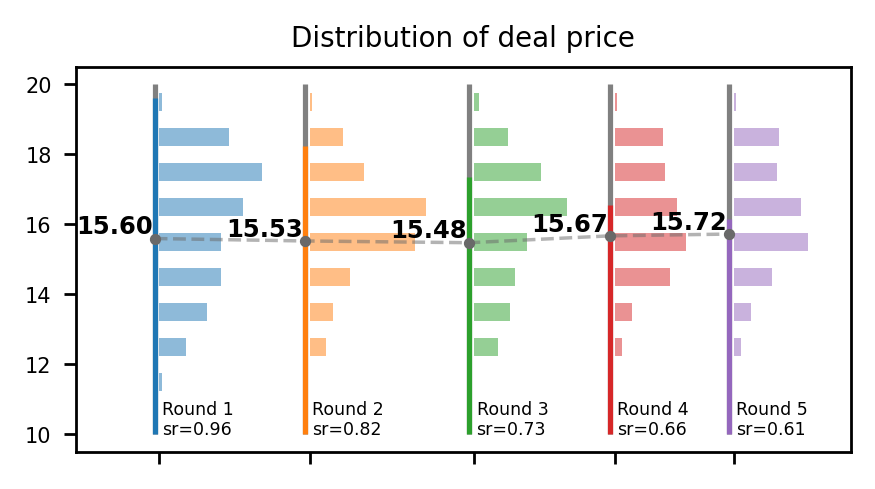

In [321]:
prices = parse_outputs_v2("../outputs/criticize_buyer_200_runs_5_rollout_ver_0.3.3.0.txt")

prices_ = []
for p in prices:
    p_ = []
    for pi in p:
        if(pi > 10 and pi < 20): p_.append(pi)
        else: break
    if(len(p_) > 0): prices_.append(p_)
    
prices_reshape = [[], [], [], [], []]
for p in prices_:
    for pi, p_ in enumerate(p):
        prices_reshape[pi].append(p_)

_, _ = draw_multiple(prices_reshape, xlim=(-35,290), price_number_offset=(-35, 0.15))

## 0.3.2.0 criticize seller claude

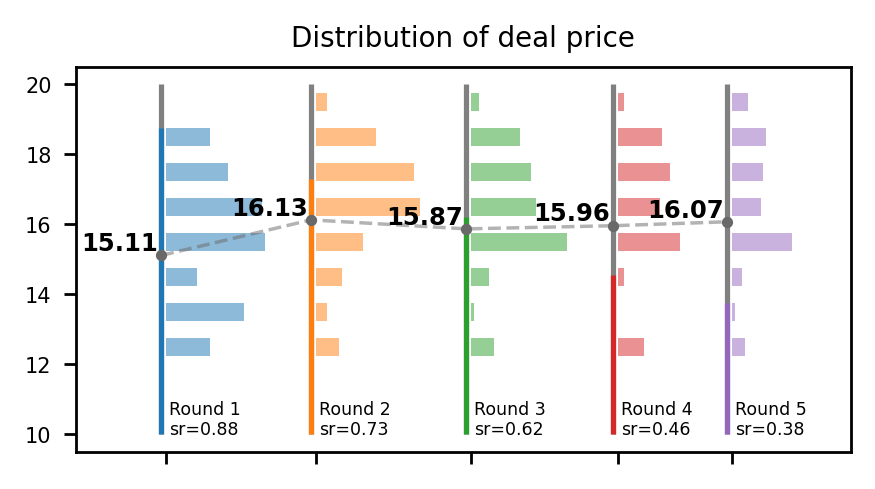

In [322]:
prices = parse_outputs_v2("../outputs/criticize_seller_200_runs_5_rollout_ver_0.3.2.0.txt")

prices_ = []
for p in prices:
    p_ = []
    for pi in p:
        if(pi > 10 and pi < 20): p_.append(pi)
        else: break
    if(len(p_) > 0): prices_.append(p_)
    
prices_reshape = [[], [], [], [], []]
for p in prices_:
    for pi, p_ in enumerate(p):
        prices_reshape[pi].append(p_)

_, _ = draw_multiple(prices_reshape, xlim=(-35,265), price_number_offset=(-33, 0.15))